Neuromorphic engineering I

## Lab 3: Transistor superthreshold saturation current and drain characteristics


**Reminder: Did you `git pull` the exercises before starting this notebook?**

Group number (if given one by TA):

Team member 1:

Team member 2:

Date:

CoACH Chip number:

-------------------------------------------------------------------------------------------------------------------

The objective of this lab is to understand _super-threshold_ ( also called _above-threshold_ or _strong inversion_ ) transistor operation and to understand transistor drain conductance characteristics, particularly _channel length modulation_.

The specific experimental **objectives of this lab**  are as follows: 
1. To characterize drain current of a transistor as a function of gate voltage in superthreshold operation in the ohmic (triode) and saturation regions.
2. To characterize the drain saturation properties in super-threshold.
3. To characterize drain conductance (the Early effect) and how it scales with transistor length (may not be possible this year) and saturation drain current.

An intuitive and quantitative understanding of all these effects, along with the subthreshold behavior (last week), is useful for the design of effective circuits, especially analog design of high performance amplifiers.

# 1 Terminology

- above-threshold = super-threshold =  strong inversion
- sub-threshold = below-threshold = weak inversion
- triode region = ohmic region = linear drain conductance behavior with small drain-source voltage
- saturation = large $V_{\rm ds}$ 
- $U_{\rm T} \equiv kT/q$ = thermal voltage = 25mV at room temperature
- $V_{\rm T}$ = threshold voltage = 0.4V to 0.8V depending on process
- overdrive = $V_{\rm ov} \equiv V_{\rm g}-V_{\rm T}$


# 2 Useful Quantities

The following is a list of the physical parameters and constants we
will be referring to in this lab, along with their values when
appropriate. The units that are most natural for these quantities are
also included; these units are not self--consistent, so make sure you
convert the units when appropriate.


* $\epsilon_0$ :  Permittivity of vacuum = $8.86\times10^{-12} \rm{ F/m}$ 
* $\epsilon_{Si}$ : Relative permittivity of ${\rm Si}$ = $11.7\epsilon_0$ 
* $\epsilon_{ox}$ : Relative permittivity of ${\rm SiO_2}$ = $3.9\epsilon_0$ 
* $\mu_n$ : electron surface mobility, ${\rm cm^2/V/s}$ 
* $\mu_p$ : hole surface mobility, ${\rm cm^2/V/s}$
* $C_{ox}$ : gate capacitance across the oxide per unit area,
	${\rm fF/\mu m^{2}}$ 
* $C_{dep}$ : capacitance of depletion region per unit area,
	${\rm fF/\mu m^{2}}$ 
* $t_{ox}$ : gate oxide thickness $\approx$
	3.8 nm for the class chip in 180 nm techology.
* $V_T$ : threshold voltage, V ($V_{T0}$ is $V_T$ when $V_s$ = 0).
* $W$ : electrical width of transistor channel, $\approx 4 \mu {\rm m}$ for both devices in this lab 
* $L$ : electrical length of transistor channel, $\approx 4 \mu {\rm m}$ for both devices in this lab
* $\beta$ $\equiv \mu C_{ox} W/L,\;\mu{\rm A/V^2}$ 
* $V_E$ : Early voltage, characterizes drain conductance. 

# 3 Prelab

Write the expressions/eqations in LaTeX, like $V_{ov}$ = $V_{\rm g}-V_{\rm T}$, or insert images of handwritten expressions. (There are handy extensions available for markdown image insertion for some Jupyter workspaces.)

* For nFET, write the most general expression for $I_{ds}$ above threshold in terms of $V_g,\;V_s,\;V_d$ (all voltages are referenced to the bulk), and the parameters and constants given above. Leave out the drain conductance Early effect in this equation. Assume $\kappa=1$ and that $V_{Tn}>0$.

* For pFET, write the most general expression for $I_{ds}$ above threshold in terms of $V_g,\;V_s,\;V_d$ (all voltages are referenced to the bulk), and the parameters and constants given above. Leave out the drain conductance Early effect in this equation. Assume $\kappa=1$ and that $V_{Tp}<0$.

- For nFET, sketch graphs of $I_{ds}$ vs the $V_d$ for several gate voltages $V_g$ above threshold, with $V_s=0$. Indicate the ohmic and saturation regions and the behavior of the saturation voltage $V_{dsat}$ as the gate overdrive voltage increases. 

- For nFET, derive an expression for the current $I_{ds}$ in the ohmic region in terms of $V_g$ and $V_{ds} \equiv V_d-V_s,$. You may assume that $V_s=0.$ Sketch a graph of $I_{ds}$ vs $V_g,$ showing $V_{T0}$ and an expression for the slope.

- For nFET, state the drain voltage condition for above-threshold saturation and derive an expression for the saturation current $I_{dsat}$ in terms of $V_g$. Sketch a graph of $\sqrt{I_{dsat}}$ vs $V_g$ with $V_s=0,$ showing $V_{T0}$ and an expression for the slope. Do not consider the Early effect here.

- Calculate $C_{ox}$ for the classchip from the [useful quantities](#2-useful-quantities). What is $C_{ox}$ per square micron in fF?


- Write the expression for the drain current in saturation including the Early effect, using $I_{dsat}$ to  represent the saturation current in the absence of the Early effect.  Use $V_E$ to represent the Early voltage.

# 4 Setup

You may want to install all the necessary requirements (python libraries)

In [8]:
import sys
!{sys.executable} -m pip install -r requirements.txt

  Using cached numpy-2.0.2-cp39-cp39-macosx_10_9_x86_64.whl.metadata (60 kB)
  Using cached matplotlib-3.9.4-cp39-cp39-macosx_10_12_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.13.1-cp39-cp39-macosx_10_9_x86_64.whl.metadata (60 kB)
  Using cached engineering_notation-0.10.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached schemdraw-0.10-py3-none-any.whl.metadata (2.0 kB)
  Using cached jupyter_save_load_vars-0.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached pyudev-0.24.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached Deprecated-1.2.18-py2.py3-none-any.whl.metadata (5.7 kB)
  Using cached pytest-8.4.2-py3-none-any.whl.metadata (7.7 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached dill-0.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached wrapt-1.17.3-cp39-cp39-macosx_10_9_x86_64.whl.metadata (6.4 kB)
  Using cached iniconfig-2.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached pluggy-1.6.0-py3-none-any.whl.metadata (4.8 kB)
  Using c

If you installed new libraries, you probably have to restart the notebook kernel

## 4.1 Connect the device

Import necessary python libraries

In [9]:
import time # for time.sleep(seconds)
import numpy as np # numpy for arrays etc
from scipy import stats # for stats.linregress
import matplotlib
import matplotlib.pyplot as plt # for plotting
import matplotlib
plt.rcParams.update({'font.size': 12}) # make the detault font size larger for your readers
matplotlib.rcParams['pdf.fonttype'] = 42 # save fonts as type that are not outlined in illustrator or other drawing programs
from engineering_notation import EngNumber as ef # format numbers in engineering format quickly, e.g. ef(2e-9)='2n'
from pathlib import Path # used for saving data

datapath = Path('data/lab3') # make a data folder to save your data called data/lab1
datapath.mkdir(parents=True, exist_ok=True)
from jupyter_save_load_vars import savevars, loadvars

from ne1 import Coach # import Coach() class
import logging
coach=Coach(logging_level=logging.INFO) # create a Coach object called p; you will use it to talk to class chip, change to logging.DEBUG for troubleshooting
# p.open()

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


Now try to open the board

In [10]:
coach.open() # open the hardware interface to the board

[INFO]: 2025-10-07 14:48:24,022 - NE1 - Opened CoACH at /dev/cu.usbmodem76183401 with firmware version (1, 12, 5) (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 175, in open)


If the above step fails, close the board and start over with replugging the board


In [ ]:
# p.close()

<a id='config_nfet'></a>
## 4.2 Configurations for N-FET

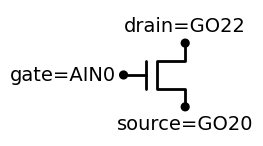

In [11]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.NFet, reverse=True)
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.drain, toplabel='drain=GO22')
d.add(elm.Dot, xy=Q.source, botlabel='source=GO20')
d.draw()

To cancel out the leakage current and shunt resistance, you may need to do a subtraction in Section 5.1.

$I_{ds} = I_{GO20} - I_{GO20}|_{V_{gs} = 0}$ 

Note: It's better to measure source because its leakage is constant in this lab

* You have to set the input voltage demultiplexer by sending a configuration event:
* Check the configuration is correct. If the measured result is not as expected, try sending the configration event again.

In [12]:
coach.open() # open the CoACH board if you came back here
coach.setup_nfet()
vdd=1.8
coach.set_nfet_vb(0) # does nothing; we cannot set it since it defines ground
coach.set_nfet_vs(0)
coach.set_nfet_vd(1)
coach.set_nfet_vg(.5)
Is_n=coach.measure_nfet_is()
Id_n=coach.measure_nfet_id()
print(f'The measured NFET currents are Is_n={ef(Is_n)}A and Id_p={ef(Id_n)}')
coach.close()

[INFO]: 2025-10-07 14:49:13,757 - NE1 - was already open (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 145, in open)
[INFO]: 2025-10-07 14:49:13,812 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 250, in close)


The measured NFET currents are Is_n=126.95nA and Id_p=170.17n


* Question: Check if the measured currents change with different gate voltages?

[INFO]: 2025-10-07 14:56:29,840 - NE1 - Opened CoACH at /dev/cu.usbmodem76183401 with firmware version (1, 12, 5) (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 175, in open)


For 0V the measured NFET currents are Is_n=244.14pA and Id_n=47.36nA
For 0.2V the measured NFET currents are Is_n=9.77nA and Id_n=42.97nA
For 0.4V the measured NFET currents are Is_n=3.91nA and Id_n=35.16nA
For 0.6V the measured NFET currents are Is_n=614.26nA and Id_n=586.18nA
For 0.8V the measured NFET currents are Is_n=991.70nA and Id_n=996.83nA
For 1V the measured NFET currents are Is_n=988.04nA and Id_n=990.48nA
For 1.5V the measured NFET currents are Is_n=998.05nA and Id_n=996.34nA


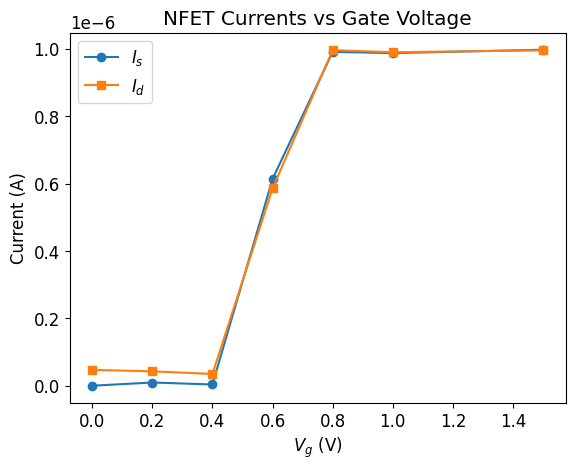

[INFO]: 2025-10-07 14:56:30,667 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 250, in close)


In [15]:
coach.open() # open the CoACH board if you came back here
coach.setup_nfet()
vdd = 1.8
vg_values = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.5]
Is_n_list = []
Id_n_list = []

coach.set_nfet_vb(0) # does nothing; we cannot set it since it defines ground
coach.set_nfet_vs(0)
coach.set_nfet_vd(1)

for vg in vg_values:
    coach.set_nfet_vg(vg)
    Is_n = coach.measure_nfet_is()
    Id_n = coach.measure_nfet_id()
    Is_n_list.append(Is_n)
    Id_n_list.append(Id_n)
    print(f'For {vg}V the measured NFET currents are Is_n={ef(Is_n)}A and Id_n={ef(Id_n)}A')

plt.figure()
plt.plot(vg_values, Is_n_list, 'o-', label='$I_s$')
plt.plot(vg_values, Id_n_list, 's-', label='$I_d$')
plt.xlabel('$V_g$ (V)')
plt.ylabel('Current (A)')
plt.title('NFET Currents vs Gate Voltage')
plt.legend()
plt.show()
coach.close()

<a id='config_pfet'></a>
## 4.3 Configurations for P-FET

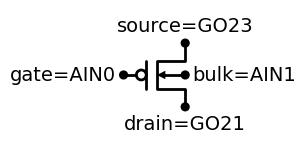

In [16]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.PFet, reverse=True, bulk=True)
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.bulk, rgtlabel='bulk=AIN1')
d.add(elm.Dot, xy=Q.drain, botlabel='drain=GO21')
d.add(elm.Dot, xy=Q.source, toplabel='source=GO23')
d.draw()

Hint: To cancel out the leakage current and shunt resistance, you may need to do a subtraction:

$I_{ds} = I_{GO23} - I_{GO23}|_{V_{gs} = 0} $

Note: Measure drain of PFET in this lab. 
Also think about the difference of $V_{gs}$ between PMOS and NMOS?

Well the sign is different depending of type of mosfet, $V_{GS}$ need to be postive for the channel to open as the p-type subbsrate has electrons as majority carriers.

In [17]:
coach.open() # open the CoACH board if you came back here
# p.open('/dev/ttyUSB0') # you might need this on WSL2 Ubuntu
coach.setup_pfet()
vdd=1.8 # define power supply since pfet is referenced to it
coach.set_pfet_vb(vdd)
coach.set_pfet_vs(vdd)
coach.set_pfet_vd(0) # set drain below source and from vdd
coach.set_pfet_vg(vdd-.5) # set gate below vdd
Is_p=coach.measure_pfet_is() #measure source current (at vdd side)
Id_p=coach.measure_pfet_id() # measure drain current (at lower voltage side)
print(f'The measured PFET currents are Is_p={ef(Is_p)}A and Id_p={ef(Id_p)}')
coach.close()

[INFO]: 2025-10-07 14:57:35,283 - NE1 - Opened CoACH at /dev/cu.usbmodem76183401 with firmware version (1, 12, 5) (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 175, in open)
[INFO]: 2025-10-07 14:57:35,338 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 250, in close)


The measured PFET currents are Is_p=64.45nA and Id_p=66.89n


# 5 Ohmic region of superthreshold tranconductance

In this experiment you will characterize the *linear* dependence of the current on the gate
voltage in the strong-inversion ohmic region, i.e. with $V_{ds}$ a small voltage for both NFET and PFET at the same time.

**(a)** Measure $I_{ds}$ as a function of $V_g$ in ohmic region, using small $V_{ds}$ and large range of $V_{gs}$

* What will be the fixed value for source and drain voltages?


* To get the quantized DAC voltages, record the returned value from _set_nfet_vX()_, e.g.
```python
    v=p.set_nfet_vg(1)
```

## Data acquisition function

We may as well define a function `measure_n_and_p_fet_ids_vs_vgs` to measure both NFET and PFET drain currents vs a gate voltage array since we need to do this multiple times  


In [18]:
def measure_n_and_p_fet_ids_vs_vgs(coach, vs, vd, vb, vg_arr):
    """Measure NFET and PFET Ids vs vg. The pfet voltages are relative to Vdd and positive.
    
    :param coach: the Coach() board object
    :param vs: the Vs you want;
    :param vd: the Vd you want
    :param vb: the Vb (bulk) you want
    :param vg_arr: a numpy.ndarray of gate voltages
    :return: vgn_actual,id_n,is_n,   vgp_actual,id_p,is_p. 
        The actual gate voltages are quantized by the DACs.
        Both source (is) and drain (id) currents are returned. Which one to use depends on the experiment
    """
    coach.open()
    vdd=1.8
    vds=vd-vs
    n_samples=vg_arr.size
    vgn_actual=np.zeros_like(vg_arr) # for actual vgs of NFET
    vgp_actual=np.zeros_like(vg_arr) # for actual vgs of PFET
    id_n=np.zeros_like(vg_arr) # for NFET
    is_n=np.zeros_like(vg_arr) 
    id_p=np.zeros_like(vg_arr) 
    is_p=np.zeros_like(vg_arr) 
    delay=.05
    coach.setup_nfet()
    print('*** NFET data')
    for i,v in enumerate(vg_arr): # note how enumerate returns the index i and the gate voltage v
        coach.set_nfet_vb(vb)
        coach.set_nfet_vs(vs)
        coach.set_nfet_vd(vd)
        vgn_actual[i]=coach.set_nfet_vg(v)
        time.sleep(delay)
        is_n[i]=coach.measure_nfet_is()
        id_n[i]=coach.measure_nfet_id()

        if i%10==0:
            print(f'NFET vgs={ef(v)}: id_n={ef(id_n[i])}, is_n={ef(is_n[i])}')

    coach.setup_pfet()
    print('*** PFET data')
    for i,v in enumerate(vg_arr): # note how enumerate returns the index i and the gate voltage v
        coach.set_pfet_vb(vdd-vb)
        coach.set_pfet_vs(vdd-vs)
        coach.set_pfet_vd(vdd-vd)
        vgp_actual[i]=vdd-coach.set_pfet_vg(vdd-v) # store vsg from vdd
        time.sleep(delay)
        id_p[i]=coach.measure_pfet_id()
        is_p[i]=coach.measure_pfet_is()
        if i%10==0:
            print(f'PFET vgs={ef(v)}: id_p={ef(id_p[i])}, is_p={ef(is_p[i])}')
    coach.close()
    # plot 
    plt.plot(vgn_actual,id_n, vgn_actual,is_n)
    plt.plot(vgp_actual,id_p, vgp_actual,is_p)
    plt.title(f'Ids vs Vgs for Vds={ef(vds)}V')
    plt.ylabel('|$I_{ds}|$ (A)')
    plt.xlabel('|$V_{gs}|$ (V)') # note absolute value here
    plt.legend(['$I_d$ NFET','$I_s$ NFET','$I_d$ PFET','$I_s$ PFET'])
    return vgn_actual,id_n,is_n, vgp_actual,id_p,is_p

* Now do the actual measurement

If the results do not look reasonable, see the [README](https://code.ini.uzh.ch/CoACH/CoACH-labs/-/blob/master/readme.md#how-fet-currents-are-measuredd) to check your current ADC gain settings.

For these superthreshold measurements, you need to sweep from just below threshold to way above it, up to the limit of the current sensing of the CoACH board.

[INFO]: 2025-10-07 15:31:40,273 - NE1 - Opened CoACH at /dev/cu.usbmodem76183401 with firmware version (1, 12, 5) (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 175, in open)


*** NFET data
NFET vgs=600m: id_n=2.51u, is_n=48.83n
NFET vgs=721.21m: id_n=2.22u, is_n=2.47u
NFET vgs=842.42m: id_n=8.33u, is_n=5.71u
NFET vgs=963.64m: id_n=11.91u, is_n=11.91u
NFET vgs=1.08: id_n=19.38u, is_n=17.19u
NFET vgs=1.21: id_n=22.41u, is_n=22.14u
NFET vgs=1.33: id_n=26u, is_n=25.93u
NFET vgs=1.45: id_n=30.64u, is_n=30.96u
NFET vgs=1.57: id_n=33.18u, is_n=32.25u
NFET vgs=1.69: id_n=36.72u, is_n=36.96u
*** PFET data
PFET vgs=600m: id_p=6.05u, is_p=5.88u
PFET vgs=721.21m: id_p=5.91u, is_p=5.42u
PFET vgs=842.42m: id_p=7.01u, is_p=6.79u
PFET vgs=963.64m: id_p=6.03u, is_p=6.74u
PFET vgs=1.08: id_p=6.37u, is_p=5.57u
PFET vgs=1.21: id_p=8.64u, is_p=7.18u
PFET vgs=1.33: id_p=8.86u, is_p=5.35u
PFET vgs=1.45: id_p=9.50u, is_p=6.52u
PFET vgs=1.57: id_p=9.11u, is_p=8.54u
PFET vgs=1.69: id_p=8.15u, is_p=8.69u


[INFO]: 2025-10-07 15:31:52,110 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 250, in close)


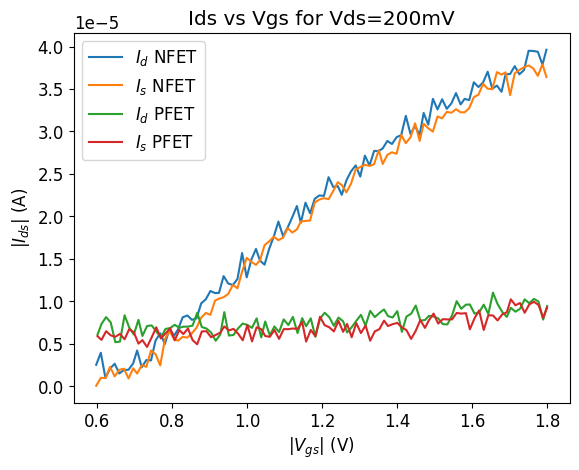

In [42]:
n_samples=100
vdd=1.8
vs=0
vd=.2 # NOTE play to get 'best' results
vb=0
vds=vd-vs
vg_low=.6 # NOTE adjust to capture only range that current ADC can capture without saturating
vg_high= vdd #vdd # NOTE adjust to capture only range that current ADC can capture without saturating
vg_arr=np.linspace(vg_low,vg_high,n_samples)

# NOTE that the limit of current measurement with default switch settings is 1uA, so if you do a sweep of Vg to vdd you will exceed this limit
vgn_actual,id_n,is_n, vgp_actual,id_p,is_p = measure_n_and_p_fet_ids_vs_vgs(coach, vs,vd ,vb, vg_arr)

# NOTE choose the ones that look best here
ids_n=is_n
ids_p=id_p 


Theres a large leakage current in the pfet. Also the current flowing thorugh is very low. We expect it to be lower than the NFET, since even with same same configuration (W and L and $|V_{gs}|$), the $\mu_n$ is lower for the pfet mjaority carriers (holes), in the sense that it is 2.5x higher for electrons.

In [29]:
# if the data looks good, save it
savevars(datapath/'ids-vs-vgs-ohmic', overwrite='yes')



[INFO]: 2025-10-07 15:25:21,025 - saveloadvars - Saved to data/lab3/ids-vs-vgs-ohmic.dill variables [ datapath vdd Is_n Id_n vg_values Is_n_list Id_n_list vg Is_p Id_p n_samples vs vd vb vds vg_low vg_high vg_arr vgn_actual id_n is_n vgp_actual id_p is_p ids_n ids_p ] (File "/opt/miniconda3/envs/ne1/lib/python3.9/site-packages/jupyter_save_load_vars.py", line 219, in savevars)
[WARNING]: 2025-10-07 15:25:21,026 - saveloadvars - could not pickle: ['coach', 'd', 'Q'] (File "/opt/miniconda3/envs/ne1/lib/python3.9/site-packages/jupyter_save_load_vars.py", line 221, in savevars)


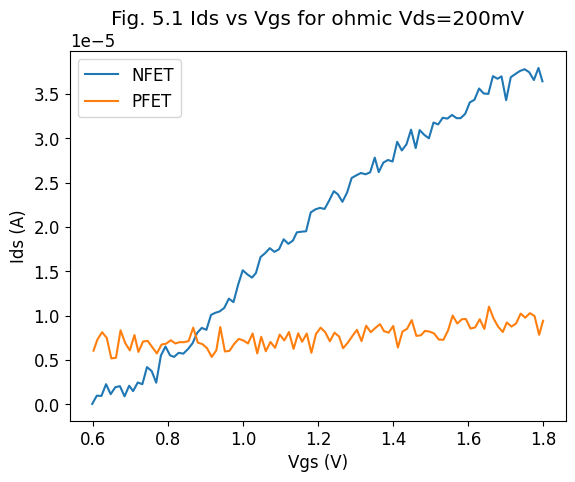

In [43]:
# plot 
plt.plot(vgn_actual,ids_n)
plt.plot(vgp_actual,ids_p)
plt.title(f'Fig. 5.1 Ids vs Vgs for ohmic Vds={ef(vds)}V')
plt.ylabel('Ids (A)')
plt.xlabel('Vgs (V)')
plt.legend(['NFET','PFET'])


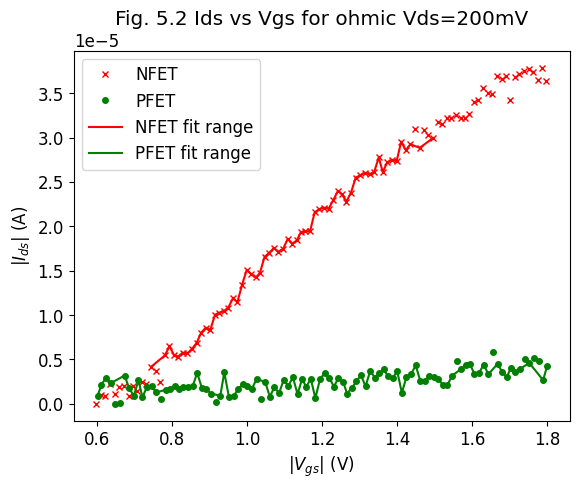

In [44]:
# extract the valid range
def get_linear_range(vg:np.array,id:np.ndarray, range=[.1,.8]): # type hint for completion
    """ gets the vg and id that line in range of the source data
    
    :param vg: the gate voltages
    :param id: the drain currents
    :param range: [low,high] the range as fractions 0-1 of selected id currents
    :return: the selected vg,id
    """
    imin=np.min(id); imax=np.max(id)
    irange=imax-imin
    ilow=irange*range[0]
    ihigh=irange*range[1]
    idx=np.where((id>ilow) & (id<ihigh))
    if len(idx)==0:
        print('no id values are between {ef(imin*factor)} and {ef(id<imax/factor)}; change factors')
    return vg[idx], id[idx]

# first, subtract the minimum measured current which we consider the leakage current
idn_corr=ids_n-np.min(ids_n)
idp_corr=ids_p-np.min(ids_p)

vgn_lin,idn_lin=get_linear_range(vgn_actual,idn_corr)
vgp_lin,idp_lin=get_linear_range(vgp_actual,idp_corr)

# plot 
plt.plot(vgn_actual,idn_corr,'rx',markersize=4)
plt.plot(vgp_actual,idp_corr,'go',markersize=4)
plt.plot(vgn_lin,idn_lin,'r-')
plt.plot(vgp_lin,idp_lin,'g-')
plt.title(f'Fig. 5.2 Ids vs Vgs for ohmic Vds={ef(vds)}V')
plt.ylabel('|$I_{ds}|$ (A)')
plt.xlabel('|$V_{gs}|$ (V)') # note absolute value here
plt.legend(['NFET','PFET','NFET fit range','PFET fit range'])



For the PFET, this method is not applicable for finding the linear region, since the data is way to noisy (i.e the whole $V_{gs}$ range form 0V to 1.8V is identified as lineaer by the method/plot)

(b) Now fit in the valid range (replace the lines showing your selected data with the actual fitted lines) to determine beta and VT0.

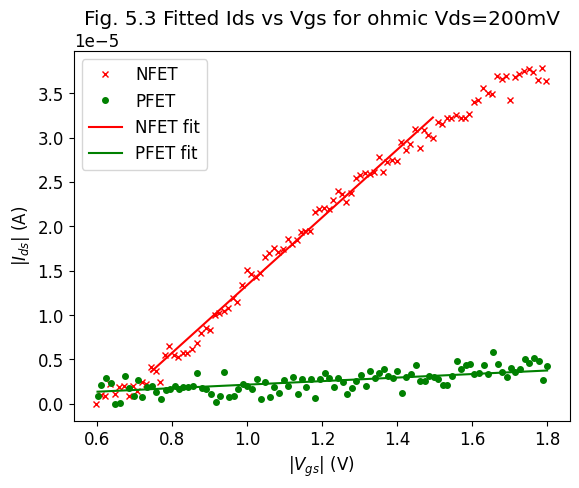

In [ ]:
# you can use code from lab2 to do this fit to  [vgn_actual,idn_corr] and [vgp_actual,idp_corr]
# loadvars(datapath/'lab3', overwrite='yes',warn=False) # if you come back here

# code from lab2 for fitting
# fit=stats.linregress(x,y) # fit a line to them; see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html 
# idp_fit=np.exp(fit.intercept+x*fit.slope) # compute the fitted values on the gate voltage points
# i0p=np.exp(fit.intercept) # compute current at Vg=0
# # fit.slope is efolds/volt
# U_T=25e-3 # thermal voltage in Volts
# q=1.6e-19 # elementary change in Coulombs
# v_per_efold_p=1/fit.slope # compute the volts for one "e-fold" (factor of increase of e)
# # compute kappa from UT and v_per_efold
# kappa=U_T/v_per_efold_p


fit_n=stats.linregress(vgn_lin,idn_lin) # fit a line to them; see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html 
fit_p=stats.linregress(vgp_lin,idp_lin) # fit a line to them; see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html 
idn_fit=fit_n.intercept+vgn_lin*fit_n.slope # compute the fitted values on the gate voltage points
idp_fit=fit_p.intercept+vgp_lin*fit_p.slope # compute the fitted values on the gate voltage points
# units: fit.slope is A/V, fit.intercept is V
# ids=beta*(vg-vt)*vds

# plot 
plt.plot(vgn_actual,idn_corr,'rx',markersize=4)
plt.plot(vgp_actual,idp_corr,'go',markersize=4)
plt.plot(vgn_lin,idn_fit,'r-')
plt.plot(vgp_lin,idp_fit,'g-')
plt.title(f'Fig. 5.3 Fitted Ids vs Vgs for ohmic Vds={ef(vds)}V')
plt.ylabel('|$I_{ds}|$ (A)')
plt.xlabel('|$V_{gs}|$ (V)') # note absolute value here
plt.legend(['NFET','PFET','NFET fit','PFET fit'])


**(c)** Determine $V_{T0}$ and $\beta$ for both devices by using your fit to estimate the threshold voltage $V_{T}$ and transconductance paramter $\beta$, based on the expressions derived in the prelab

In [ ]:
# V_T0 for N and P FETs, you fill in the computations here based on your fit parameters extracted above
# units: fit.slope is A/V, fit.intercept is V
# ids=beta*(vg-vt)*vds

# vt0_n = ... # y=mx+b, m is slope, b is y-intercept, so x-intercept where y=0 is 0=mx+b, or x=-b/m
vt0_n = -fit_n.intercept/fit_n.slope
vt0_p = -fit_p.intercept/fit_p.slope
beta_n = fit_n.slope/vds
beta_p = fit_p.slope/vds

# compute ratio
beta_np_ratio=beta_n/beta_p
print(f'V_TOn={vt0_n:.2f}V, beta_n={ef(beta_n)}A/V^2\nV_TOp={vt0_p:.2f}V, beta_n={ef(beta_p)}A/V^2')
print(f'Beta ratio NFET/PFET is {beta_np_ratio:.2f}')

V_TOn=0.65V, beta_n=190.75uA/V^2
V_TOp=-0.08V, beta_n=9.96uA/V^2
Beta ratio NFET/PFET is 19.15


* Does the ratio between $\beta$ for the 2 devices make sense based on the relative mobilities of electrons and holes? Please comment on your results.

No, the ratio is way to high. There should be a difference since $\mu_n$ differs for holes and electrons (its higher by a factor 2.5 for electrons) and $\beta \propto \mu_n$ but er ratio of 19.5 is due to something wrong with the PFET behavior

* Is the relationship between $I_{ds}$ and $V_{gs}-V_T$ really linear? What is likely the cause of any discrepancy?

## 5.1 Effective surface mobility (optional)

Hint: Use the $V_{T0}$ you obtained in the last experiments but assume $\beta$ changes with $V_{gs}$ (thus $\mu_n$ and $\mu_p$ changes). **No need to measure again.**

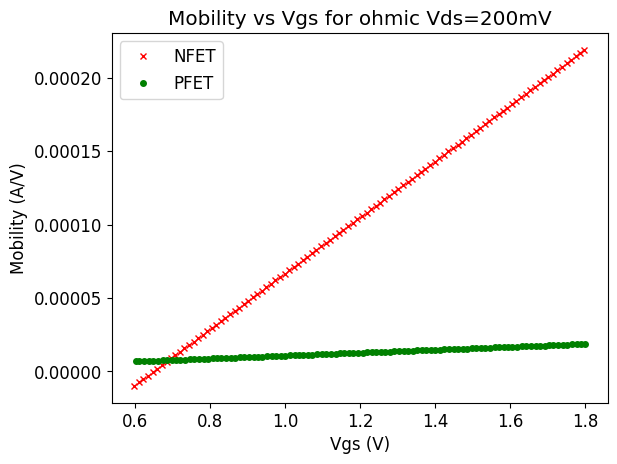

In [49]:
# plot mu vs Vgs for both devices in the same figure, i.e. the derivative of beta
mu_n=beta_n*(vgn_actual-vt0_n)
mu_p=beta_p*(vgp_actual-vt0_p)
plt.plot(vgn_actual,mu_n,'rx',markersize=4)
plt.plot(vgp_actual,mu_p,'go',markersize=4)
plt.title(f'Mobility vs Vgs for ohmic Vds={ef(vds)}V')
plt.ylabel('Mobility (A/V)')
plt.xlabel('Vgs (V)')
plt.legend(['NFET','PFET']) 
plt.show()

- Why does the mobility peak and then decay instead of remaining constant? 

- What is the ratio between the **peak** mobilities for electrons and holes?

- How different are these values from the bulk mobilities for electrons (1350 ${\rm cm^2/V/s}$) and holes (480 ${\rm cm^2/V/s}$)? 

# 6 Drain Current in the saturation region

In this experiment, repeat nearly exactly the same experiement but with a **large** $V_{ds}$, to measure the _quadratic_ dependence of the current on the gate
voltage in the saturation region. 

* Repeat the experiments from Section 5 with a large $V_{ds}$.
* Remember you should plot $\sqrt(I_{ds}))$ vs. $V_{gs}$ to see if it behaves linearly as predicted.

[INFO]: 2025-10-07 16:19:37,118 - NE1 - Opened CoACH at /dev/cu.usbmodem76183401 with firmware version (1, 12, 5) (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 175, in open)


*** NFET data
NFET vgs=500m: id_n=3.03u, is_n=512.70n
NFET vgs=621.21m: id_n=3.88u, is_n=1.81u
NFET vgs=742.42m: id_n=4.13u, is_n=3.12u
NFET vgs=863.64m: id_n=9.06u, is_n=7.45u
NFET vgs=984.85m: id_n=17.46u, is_n=16.28u
NFET vgs=1.11: id_n=27.39u, is_n=27.59u
NFET vgs=1.23: id_n=41.28u, is_n=38.35u
NFET vgs=1.35: id_n=53.32u, is_n=53.81u
NFET vgs=1.47: id_n=68.60u, is_n=68.85u
NFET vgs=1.59: id_n=85.79u, is_n=86.08u
*** PFET data
PFET vgs=500m: id_p=6.37u, is_p=2.78u
PFET vgs=621.21m: id_p=5.71u, is_p=3.88u
PFET vgs=742.42m: id_p=7.30u, is_p=2.03u
PFET vgs=863.64m: id_p=6.42u, is_p=3.66u
PFET vgs=984.85m: id_p=7.30u, is_p=3.32u
PFET vgs=1.11: id_p=7.57u, is_p=6.47u
PFET vgs=1.23: id_p=10.69u, is_p=8.62u
PFET vgs=1.35: id_p=14.18u, is_p=13.79u
PFET vgs=1.47: id_p=16.36u, is_p=18.09u
PFET vgs=1.59: id_p=21.80u, is_p=20.56u


[INFO]: 2025-10-07 16:19:48,819 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 250, in close)


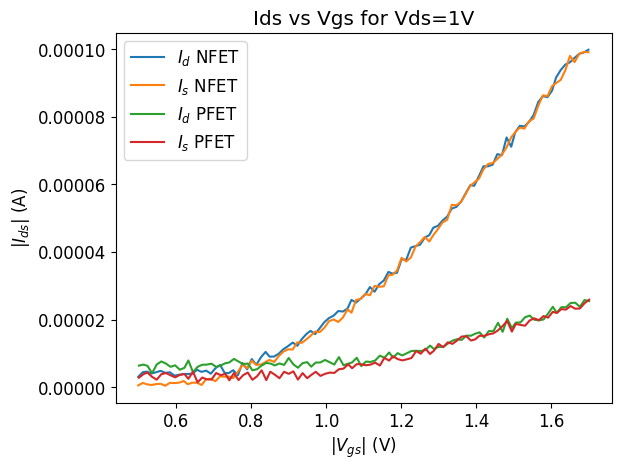

In [71]:
n_samples=100
vdd=1.8
vs=0
vd=1 # NOTE play to get 'best' results
vb=0
vds_sat=vd-vs
vg_low=.5 # NOTE adjust to capture only range that current ADC can capture without saturating
vg_high=1.7 # NOTE adjust to capture only range that current ADC can capture without saturating
vg_arr=np.linspace(vg_low,vg_high,n_samples)

# NOTE that the limit of current measurement with default switch settings is 1uA, so if you do a sweep of Vg to vdd you will exceed this limit
vgn_actual_sat, ids_n_sat, is_n_sat, vgp_actual_sat, ids_p_sat, is_p_sat = measure_n_and_p_fet_ids_vs_vgs(coach, vs, vd, vb, vg_arr)


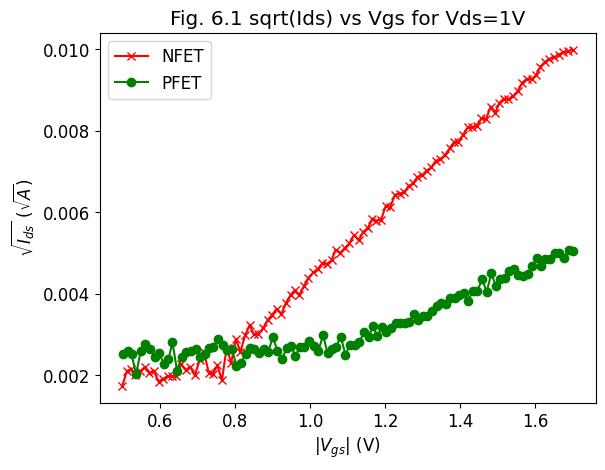

In [72]:
# plot 
plt.plot(vgn_actual_sat,np.sqrt(ids_n_sat),'r-x')
plt.plot(vgp_actual_sat,np.sqrt(ids_p_sat),'g-o')
plt.title(f'Fig. 6.1 sqrt(Ids) vs Vgs for Vds={ef(vds_sat)}V') # NOTE sqrt(Ids)
plt.ylabel('$\sqrt{I_{ds}}$ ($\sqrt{A}$)')
plt.xlabel('|$V_{gs}|$ (V)') # note absolute value here
plt.legend(['NFET','PFET'])



In [69]:
# looks good?
savevars(datapath/'ids-vs-vgs-saturation', overwrite='yes')

[INFO]: 2025-10-07 16:17:57,671 - saveloadvars - Saved to data/lab3/ids-vs-vgs-saturation.dill variables [ datapath vdd Is_n Id_n vg_values Is_n_list Id_n_list vg Is_p Id_p n_samples vs vd vb vds vg_low vg_high vg_arr vgn_actual id_n is_n vgp_actual id_p is_p ids_n ids_p idn_corr idp_corr vgn_lin idn_lin vgp_lin idp_lin fit_n fit_p idn_fit idp_fit vt0_n vt0_p beta_n beta_p beta_np_ratio mu_n mu_p vds_sat vgn_actual_sat ids_n_sat is_n_sat vgp_actual_sat ids_p_sat is_p_sat beta_n_sat beta_p_sat idn_corr_sat idp_corr_sat vgn_lin_sat idn_lin_sat vgp_lin_sat idp_lin_sat fit_n_sat fit_p_sat idn_fit_sat idp_fit_sat vt0_n_sat vt0_p_sat ] (File "/opt/miniconda3/envs/ne1/lib/python3.9/site-packages/jupyter_save_load_vars.py", line 219, in savevars)
[WARNING]: 2025-10-07 16:17:57,678 - saveloadvars - could not pickle: ['coach', 'd', 'Q'] (File "/opt/miniconda3/envs/ne1/lib/python3.9/site-packages/jupyter_save_load_vars.py", line 221, in savevars)


* From this saturation data, extract $\beta$ and $V_{T0}$

Beta_n from saturation data is 215.60uA/V^2
Beta_p from saturation data is 25.56uA/V^2
V_TOn=0.86V, V_TOp=0.58V


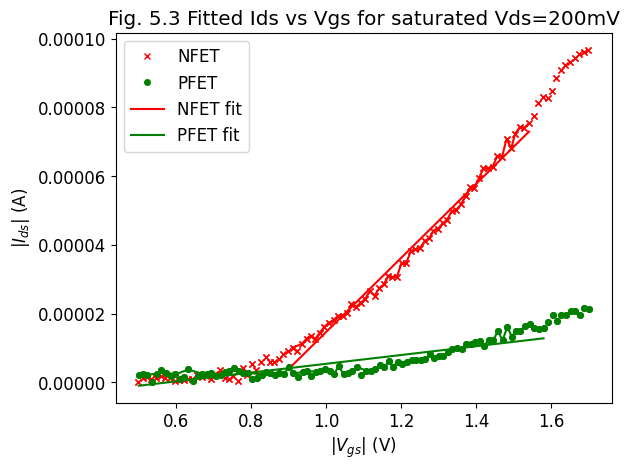

In [73]:
idn_corr_sat=ids_n_sat-np.min(ids_n_sat)
idp_corr_sat=ids_p_sat-np.min(ids_p_sat)

vgn_lin_sat,idn_lin_sat=get_linear_range(vgn_actual_sat,idn_corr_sat)
vgp_lin_sat,idp_lin_sat=get_linear_range(vgp_actual_sat,idp_corr_sat)

# plot 
plt.plot(vgn_actual_sat,idn_corr_sat,'rx',markersize=4)
plt.plot(vgp_actual_sat,idp_corr_sat,'go',markersize=4)
plt.plot(vgn_lin_sat,idn_lin_sat,'r-')
plt.plot(vgp_lin_sat,idp_lin_sat,'g-')
plt.title(f'Fig. 5.2 Ids vs Vgs for ohmic Vds={ef(vds_sat)}V')
plt.ylabel('|$I_{ds}|$ (A)')
plt.xlabel('|$V_{gs}|$ (V)') # note absolute value here
plt.legend(['NFET','PFET','NFET fit range','PFET fit range'])



fit_n_sat=stats.linregress(vgn_lin_sat,idn_lin_sat) # fit a line to them; see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html 
fit_p_sat=stats.linregress(vgp_lin_sat,idp_lin_sat) # fit a line to them; see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html 
idn_fit_sat=fit_n_sat.intercept+vgn_lin_sat*fit_n_sat.slope # compute the fitted values on the gate voltage points
idp_fit_sat=fit_p_sat.intercept+vgp_lin_sat*fit_p_sat.slope # compute the fitted values on the gate voltage points
# units: fit.slope is A/V, fit.intercept is V
# ids=beta*(vg-vt)*vds

# plot 
plt.plot(vgn_actual_sat,idn_corr_sat,'rx',markersize=4)
plt.plot(vgp_actual_sat,idp_corr_sat,'go',markersize=4)
plt.plot(vgn_lin_sat,idn_fit_sat,'r-')
plt.plot(vgp_lin_sat,idp_fit_sat,'g-')
plt.title(f'Fig. 5.3 Fitted Ids vs Vgs for saturated Vds={ef(vds)}V')
plt.ylabel('|$I_{ds}|$ (A)')
plt.xlabel('|$V_{gs}|$ (V)') # note absolute value here
plt.legend(['NFET','PFET','NFET fit','PFET fit'])


beta_n_sat=2*fit_n_sat.slope/vds_sat
beta_p_sat=2*fit_p_sat.slope/vds_sat
print(f'Beta_n from saturation data is {ef(beta_n_sat)}A/V^2')
print(f'Beta_p from saturation data is {ef(beta_p_sat)}A/V^2')
vt0_n_sat = -fit_n_sat.intercept/fit_n_sat.slope
vt0_p_sat = -fit_p_sat.intercept/fit_p_sat.slope
print(f'V_TOn={vt0_n_sat:.2f}V, V_TOp={vt0_p_sat:.2f}V')

## 7 Comparisons of ohmic and saturation superthreshold transconductance models

* Are the measurements of $V_{T0}$ and $\beta$ from the saturation measurement consistent with the values obtained in the ohmic region? 

* Which is a better approximation, the linear one or the quadratic?

# 7 Early effect - Channel length modulation - Drain conductance

This experiment studies how Early voltage scales with transistor current; in particular, how valid are the simple assumptions about channel length modulation?

The measurements are nearly identical to previous one, only for each curve you will fix $V_{gs}$ and sweep $V_{ds}$, always still measuring $I_{ds}$. 

For your convenience, we made a function `measure_n_and_p_fet_ids_vs_vds` to do the measurement:

In [75]:
def measure_n_and_p_fet_ids_vs_vds(coach, vg_n, vg_p, vs, vb, vd_arr):
    """Measure NFET and PFET Ids vs Vds. The pfet voltages are set relative to Vdd and negated for you.
    
    :param coach: the Coach() board object
    :param vg_n: the NFET gate voltage (abs value relative to bulk)
    :param vg_p: the PFET gate voltage (abs value relative to bulk)
    :param vs: the Vs you want;
    :param vb: the Vb (bulk) you want
    :param vd_arr: np.ndarray of drain voltages, (abs value relative to bulk)
    :param measure_is: True to measure the source currents, False to measure drain currents. 
        It would seem to make more sense to measure source current because the voltage and hence leakage is fixed.
    :return: vds_actual_n, ids_n, vgp_actual_n, ids_p. 
        The quantized Vds and Ids currents.
    """
    measure_is=True # to change measurement from source to drain set False
    # actually measure_is=True measures NFET at src and PFET at drain
    coach.open()
    vdd=1.8
    ids_n=np.zeros_like(vd_arr) # for NFET
    ids_p=np.zeros_like(vd_arr) # for NFET
    vds_actual_n=np.zeros_like(vd_arr) # for NFET
    vds_actual_p=np.zeros_like(vd_arr) # for NFET
    delay=.01
    n_avg=100 # NOTE sets how many current measurements are averaged for each point
    print(f'averaging {n_avg} ids samples for each vds')

    coach.setup_nfet()
    vgn_actual=coach.set_nfet_vg(vg_n) # set gate bulk and src
    coach.set_nfet_vb(vb)
    coach.set_nfet_vs(vs)
    for i,v in enumerate(vd_arr): # note how enumerate returns the index i and the gate voltage v
        vds_actual_n[i]=coach.set_nfet_vd(v) # set drain
        time.sleep(delay)
        sum=0
        for j in range(n_avg):
            cur=(coach.measure_nfet_is() if measure_is else coach.measure_nfet_id())
            # print(f'cur {i} is {ef(cur)}A')
            sum+=cur
        avg=sum/n_avg
        ids_n[i]=avg
        # print(f'      NFET ids_n[{i}] is {ef(ids_n[i])}A')
        # ids_n[i]=coach.measure_nfet_is() if measure_is else coach.measure_nfet_id() # NOTE it might be better to measure Id here
        if i%10==0:
            print(f'NFET vg={ef(vg_n)}V vds={ef(v)}: ids_n={ef(ids_n[i])}')

    coach.setup_pfet()
    vgp_actual=vdd-coach.set_pfet_vg(vdd-vg_p) # store vsg from vdd
    coach.set_pfet_vb(vdd-vb)
    coach.set_pfet_vs(vdd-vs)
    for i,v in enumerate(vd_arr): # note how enumerate returns the index i and the gate voltage v
        vds_actual_p[i]=vdd-coach.set_pfet_vd(vdd-v)
        time.sleep(delay)
        sum=0
        for j in range(n_avg):
            cur=(coach.measure_pfet_id() if measure_is else coach.measure_pfet_is())
            # print(f'PFET cur {i} is {ef(cur)}A')
            sum+=cur
        avg=sum/n_avg
        ids_p[i]=avg
        # print(f'      PFET ids_n[{i}] is {ef(ids_p[i])}A')
        # ids_p[i]=coach.measure_pfet_id() if measure_is else coach.measure_pfet_is() # NOTE it might be better to measure Id here
        if i%10==0:
            print(f'PFET vg={ef(vg_p)}V vds={ef(v)}: ids_p={ef(ids_p[i])}')
    coach.close()
    ids_n=np.array(ids_n)
    ids_p=np.array(ids_p) # make num,py arrays to return and plot

    # subtract leakage at vds=0 from both curves
    nleak=ids_n[0]
    pleak=ids_p[0]
    print(f'subtracting leakage Ids at Vds=0 of NFET: {ef(nleak)}A PFET {ef(pleak)}A')
    ids_n-=nleak
    ids_p-=pleak
    
    # plot 
    plt.plot(vds_actual_n,ids_n,'r-*')
    plt.plot(vds_actual_p,ids_p,'g-*')
    plt.title(f'Ids vs Vds for Vg_n={ef(vg_n-vs)}V Vg_p={ef(vg_p-vs)}V')
    plt.ylabel('|$I_{ds}|$ (A)')
    plt.xlabel('|$V_{ds}|$ (V)') # note absolute value here
    plt.legend(['NFET','PFET'])
    plt.show()
    return vds_actual_n,ids_n,vds_actual_p,ids_p

**(a)** Measure $I_{ds}$ vs $V_{ds}$ for different $V_{gs}$ spanning as large a range of drain currents as you can confidently measure

Here is some measurement code for your convenience. You may need to adjust values; see NOTE

[INFO]: 2025-10-07 16:23:39,942 - NE1 - Opened CoACH at /dev/cu.usbmodem76183401 with firmware version (1, 12, 5) (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 175, in open)


[INFO]: 2025-10-07 16:23:39,948 - NE1 - was already open (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 145, in open)


averaging 100 ids samples for each vds
NFET vg=900mV vds=0: ids_n=870.61n
NFET vg=900mV vds=620.69m: ids_n=10.63u
NFET vg=900mV vds=1.24: ids_n=11.02u
PFET vg=800mV vds=0: ids_p=6.46u
PFET vg=800mV vds=620.69m: ids_p=6.65u
PFET vg=800mV vds=1.24: ids_p=6.72u


[INFO]: 2025-10-07 16:23:43,784 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 250, in close)


subtracting leakage Ids at Vds=0 of NFET: 870.61nA PFET 6.46uA


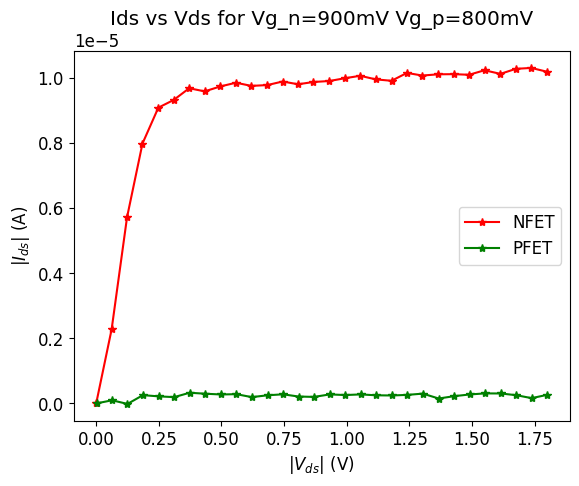

[INFO]: 2025-10-07 16:23:44,547 - NE1 - Opened CoACH at /dev/cu.usbmodem76183401 with firmware version (1, 12, 5) (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 175, in open)


averaging 100 ids samples for each vds
NFET vg=985.71mV vds=0: ids_n=846.19n
NFET vg=985.71mV vds=620.69m: ids_n=16.32u
NFET vg=985.71mV vds=1.24: ids_n=16.64u
PFET vg=900mV vds=0: ids_p=6.58u
PFET vg=900mV vds=620.69m: ids_p=6.94u
PFET vg=900mV vds=1.24: ids_p=6.94u


[INFO]: 2025-10-07 16:23:48,351 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 250, in close)


subtracting leakage Ids at Vds=0 of NFET: 846.19nA PFET 6.58uA


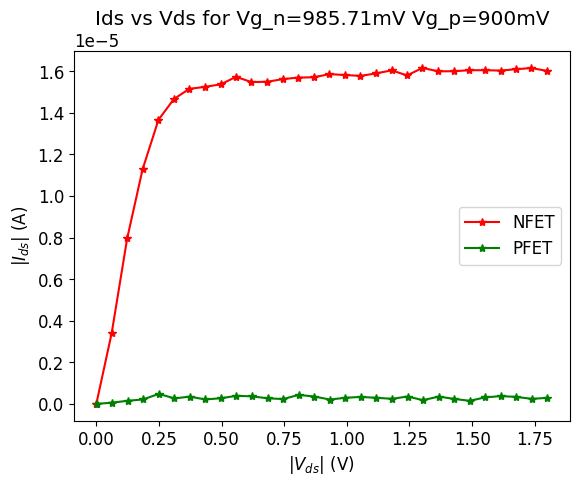

[INFO]: 2025-10-07 16:23:49,126 - NE1 - Opened CoACH at /dev/cu.usbmodem76183401 with firmware version (1, 12, 5) (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 175, in open)


averaging 100 ids samples for each vds
NFET vg=1.07V vds=0: ids_n=841.31n
NFET vg=1.07V vds=620.69m: ids_n=23.15u
NFET vg=1.07V vds=1.24: ids_n=23.62u
PFET vg=1V vds=0: ids_p=6.46u
PFET vg=1V vds=620.69m: ids_p=7.22u
PFET vg=1V vds=1.24: ids_p=7.10u


[INFO]: 2025-10-07 16:23:52,809 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 250, in close)


subtracting leakage Ids at Vds=0 of NFET: 841.31nA PFET 6.46uA


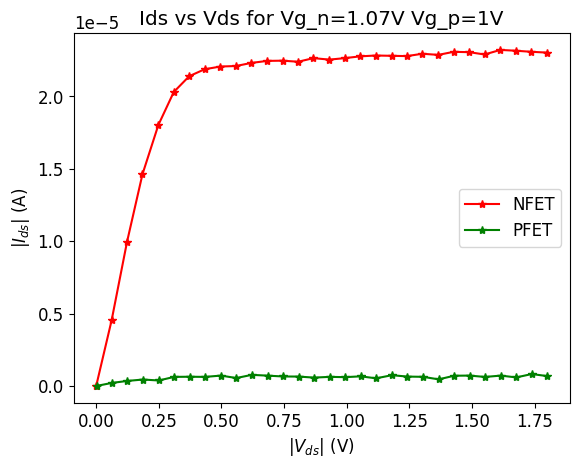

[INFO]: 2025-10-07 16:23:53,859 - NE1 - Opened CoACH at /dev/cu.usbmodem76183401 with firmware version (1, 12, 5) (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 175, in open)


averaging 100 ids samples for each vds
NFET vg=1.16V vds=0: ids_n=805.18n
NFET vg=1.16V vds=620.69m: ids_n=30.99u
NFET vg=1.16V vds=1.24: ids_n=31.74u
PFET vg=1.10V vds=0: ids_p=6.49u
PFET vg=1.10V vds=620.69m: ids_p=7.61u
PFET vg=1.10V vds=1.24: ids_p=7.63u


[INFO]: 2025-10-07 16:23:57,519 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 250, in close)


subtracting leakage Ids at Vds=0 of NFET: 805.18nA PFET 6.49uA


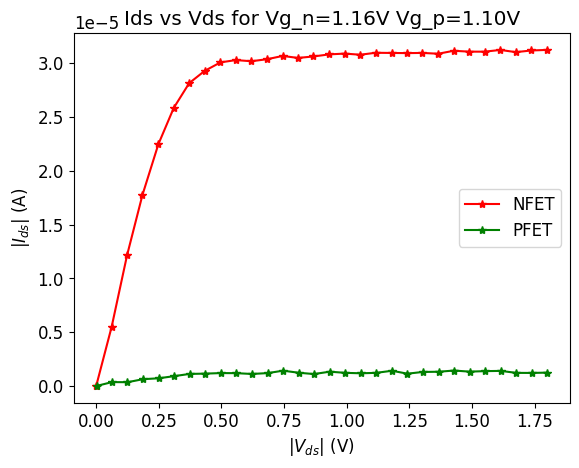

[INFO]: 2025-10-07 16:23:58,281 - NE1 - Opened CoACH at /dev/cu.usbmodem76183401 with firmware version (1, 12, 5) (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 175, in open)


averaging 100 ids samples for each vds
NFET vg=1.24V vds=0: ids_n=801.27n
NFET vg=1.24V vds=620.69m: ids_n=40.03u
NFET vg=1.24V vds=1.24: ids_n=40.92u
PFET vg=1.20V vds=0: ids_p=6.52u
PFET vg=1.20V vds=620.69m: ids_p=9.47u
PFET vg=1.20V vds=1.24: ids_p=9.57u


[INFO]: 2025-10-07 16:24:01,979 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 250, in close)


subtracting leakage Ids at Vds=0 of NFET: 801.27nA PFET 6.52uA


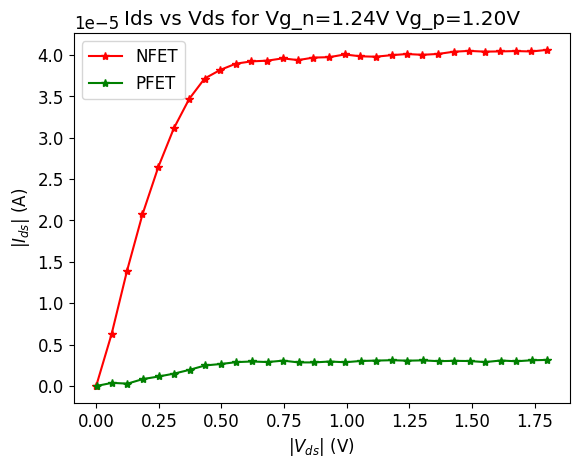

[INFO]: 2025-10-07 16:24:02,744 - NE1 - Opened CoACH at /dev/cu.usbmodem76183401 with firmware version (1, 12, 5) (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 175, in open)


averaging 100 ids samples for each vds
NFET vg=1.33V vds=0: ids_n=821.78n
NFET vg=1.33V vds=620.69m: ids_n=49.85u
NFET vg=1.33V vds=1.24: ids_n=51.29u
PFET vg=1.30V vds=0: ids_p=6.51u
PFET vg=1.30V vds=620.69m: ids_p=12.19u
PFET vg=1.30V vds=1.24: ids_p=12.18u


[INFO]: 2025-10-07 16:24:06,618 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 250, in close)


subtracting leakage Ids at Vds=0 of NFET: 821.78nA PFET 6.51uA


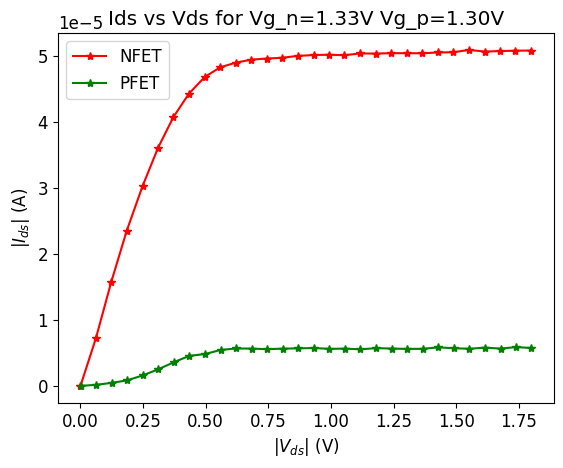

[INFO]: 2025-10-07 16:24:07,373 - NE1 - Opened CoACH at /dev/cu.usbmodem76183401 with firmware version (1, 12, 5) (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 175, in open)


averaging 100 ids samples for each vds
NFET vg=1.41V vds=0: ids_n=881.10n
NFET vg=1.41V vds=620.69m: ids_n=60.08u
NFET vg=1.41V vds=1.24: ids_n=62.06u
PFET vg=1.40V vds=0: ids_p=6.31u
PFET vg=1.40V vds=620.69m: ids_p=14.96u
PFET vg=1.40V vds=1.24: ids_p=15.24u


[INFO]: 2025-10-07 16:24:11,046 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 250, in close)


subtracting leakage Ids at Vds=0 of NFET: 881.10nA PFET 6.31uA


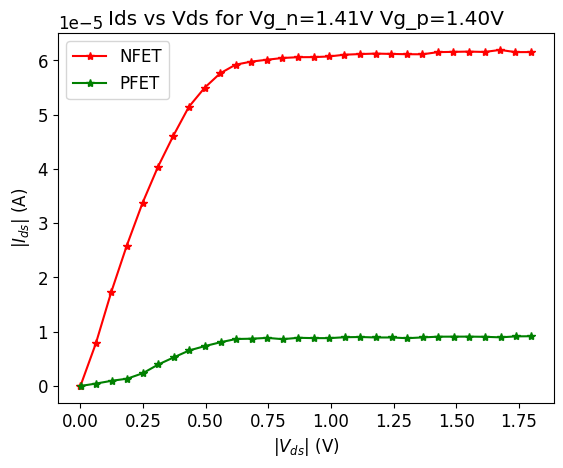

[INFO]: 2025-10-07 16:24:11,801 - NE1 - Opened CoACH at /dev/cu.usbmodem76183401 with firmware version (1, 12, 5) (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 175, in open)


averaging 100 ids samples for each vds
NFET vg=1.50V vds=0: ids_n=892.82n
NFET vg=1.50V vds=620.69m: ids_n=69.94u
NFET vg=1.50V vds=1.24: ids_n=73.80u
PFET vg=1.50V vds=0: ids_p=6.59u
PFET vg=1.50V vds=620.69m: ids_p=17.54u
PFET vg=1.50V vds=1.24: ids_p=18.74u


[INFO]: 2025-10-07 16:24:15,477 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/jesperjorgen/Desktop/pappas_comp/1UNI/ETH/NE1/CoACH-LABS/ne1.py", line 250, in close)


subtracting leakage Ids at Vds=0 of NFET: 892.82nA PFET 6.59uA


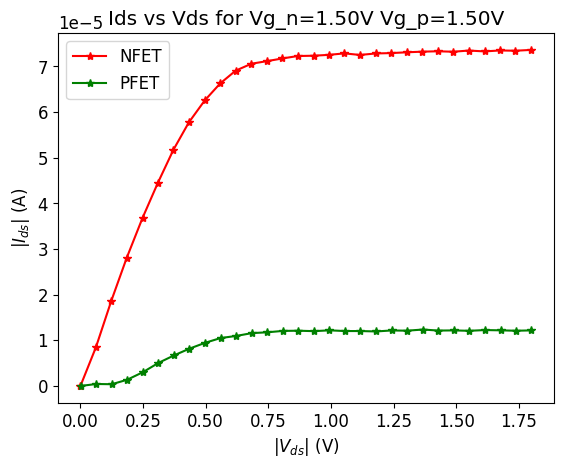

In [76]:
coach=Coach()
coach.open()
n_samples=30 # NOTE how many vds values
vdd=1.8
# NOTE that the limit of current measurement with default switch settings is 1uA, so if you do a sweep of Vg to vdd you will exceed this limit
n_gate_voltages=8
vg_arr_n=np.linspace(.9,1.5,n_gate_voltages) # NOTE you may need to play with these values
vg_arr_p=np.linspace(.8,1.5,n_gate_voltages) # NOTE you may need to play with these values
vd_arr=np.linspace(0,vdd,n_samples)
vs=0
vb=0
vds=vd_arr-vs
idsnlist=[]
idsplist=[] # make arrays and stack at the end https://stackoverflow.com/questions/58083743/what-is-the-fastest-way-to-stack-numpy-arrays-in-a-loop

for i in range(n_gate_voltages):
    vgn=vg_arr_n[i]
    vgp=vg_arr_p[i]
    vds_actual_n,ids_n,vds_actual_p,ids_p=measure_n_and_p_fet_ids_vs_vds(coach, vgn, vgp, vs, vb, vd_arr)
    idsnlist.append(ids_n)
    idsplist.append(ids_p)
ids_vs_vds_n=np.stack(idsnlist)
ids_vs_vds_p=np.stack(idsplist)

* Does the data make sense? If not change your parameters

* When you have good looking data, plot it all together

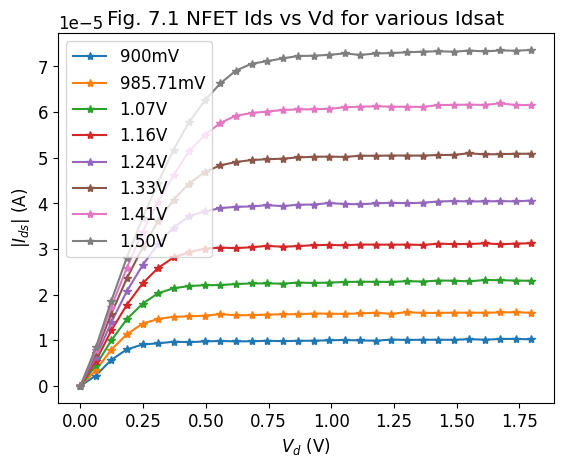

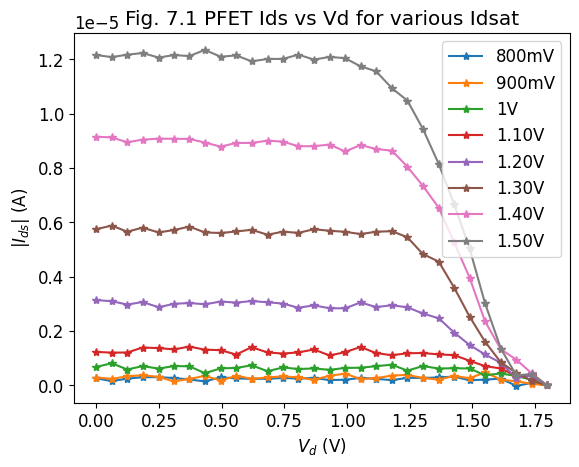

In [77]:
# plots summarized Ids vs Vds data
def plot_idsvds_curves(vg_arr, vds, ids_matrix, title):
    plt.title(f'Fig. 7.1 {title} Ids vs Vd for various Idsat')
    plt.ylabel('|$I_{ds}|$ (A)')
    plt.xlabel('$V_{d}$ (V)') # note absolute value here
    leg=[]
    for i,v in enumerate(vg_arr):
        plt.plot(vds,np.transpose(ids_matrix[i,:]),'-*')
        leg.append(str(ef(v))+'V')
    plt.legend(leg)
    plt.show()
plot_idsvds_curves(vg_arr_n,vds_actual_n, ids_vs_vds_n, 'NFET')
plot_idsvds_curves(vg_arr_p,vdd-vds_actual_p,ids_vs_vds_p, 'PFET')


* **(b)** Fit a line to the ”flat” part of each drain current curve. Select a range of drain voltages to fit the line and use the same range for each curve, because the Early effect is actually curved in reality, and what you are actually seeing might include the start of Drain Induced Barrier Lowering (DIBL) or impact ionization. This is a bit unlikely for such long (1$\mu$m) FETs, but you can see if the slope increases for large $V_{ds}$.

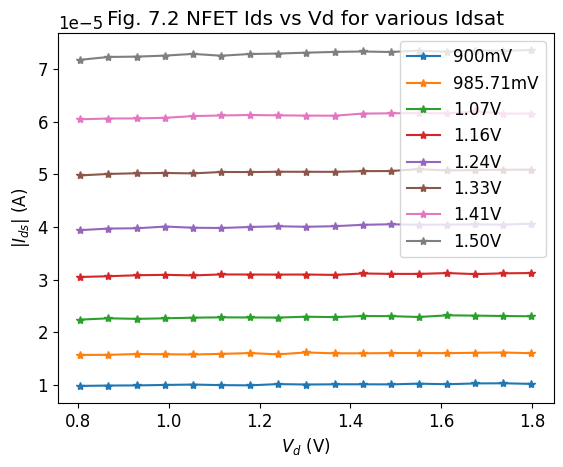

NFET gm for Vg=900mV is 415.16nS
NFET gm for Vg=985.71mV is 389.18nS
NFET gm for Vg=1.07V is 651.60nS
NFET gm for Vg=1.16V is 575.83nS
NFET gm for Vg=1.24V is 1.05uS
NFET gm for Vg=1.33V is 961.37nS
NFET gm for Vg=1.41V is 1.24uS
NFET gm for Vg=1.50V is 1.56uS


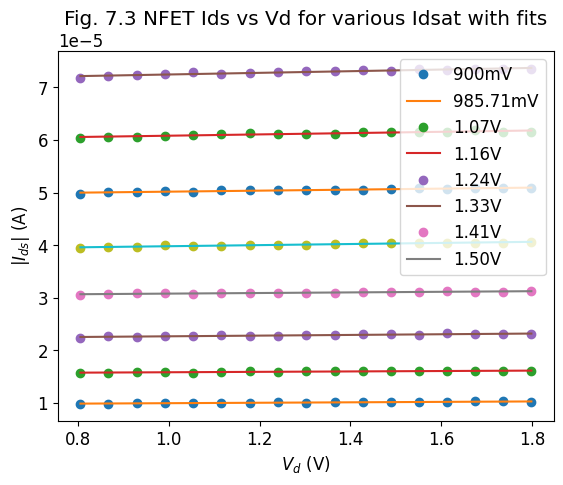

In [86]:

#find index where Vds is closest to 0.8V
vds_target=0.8
idx_n=(np.abs(vds_actual_n-vds_target)).argmin()

#fit a line to the Ids vs Vds at that Vds for the NFET and up until the max vds
for i in range(n_gate_voltages):
    plt.plot(vds_actual_n[idx_n:30],ids_vs_vds_n[i,idx_n:30],'-*')
plt.title(f'Fig. 7.2 NFET Ids vs Vd for various Idsat')
plt.ylabel('|$I_{ds}$| (A)')
plt.xlabel('$V_{d}$ (V)') # note absolute value here
leg=[]
for i,v in enumerate(vg_arr_n):
    leg.append(str(ef(v))+'V')
plt.legend(leg)
plt.show()

# now do linear fit of ieach curve
gm_n=np.zeros(n_gate_voltages)
for i in range(n_gate_voltages):
    fit=stats.linregress(vds_actual_n[idx_n:30],ids_vs_vds_n[i,idx_n:30]) # fit a line to them; see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html 
    gm_n[i]=fit.slope
    print(f'NFET gm for Vg={ef(vg_arr_n[i])}V is {ef(gm_n[i])}S')
    ids_fit=fit.intercept+vds_actual_n[idx_n:30]*fit.slope # compute the fitted values on the gate voltage points
    plt.plot(vds_actual_n[idx_n:30],ids_vs_vds_n[i,idx_n:30],'o')
    plt.plot(vds_actual_n[idx_n:30],ids_fit,'-')
plt.title(f'Fig. 7.3 NFET Ids vs Vd for various Idsat with fits')
plt.ylabel('|$I_{ds}$| (A)')
plt.xlabel('$V_{d}$ (V)') # note absolute value here
leg=[]
for i,v in enumerate(vg_arr_n):
    leg.append(str(ef(v))+'V')
plt.legend(leg)
plt.show()

**You only need to do N-FET**  You can add the PFET if you are curious about it, because it appears to have a **much** higher Early voltage.

* Compute the Early voltage from the fitted slope of I vs V and the I intercept
* Plot the Early voltage vs drain current on a semilogx scale.

Text(0, 0.5, '$V_{E}$ (V)')

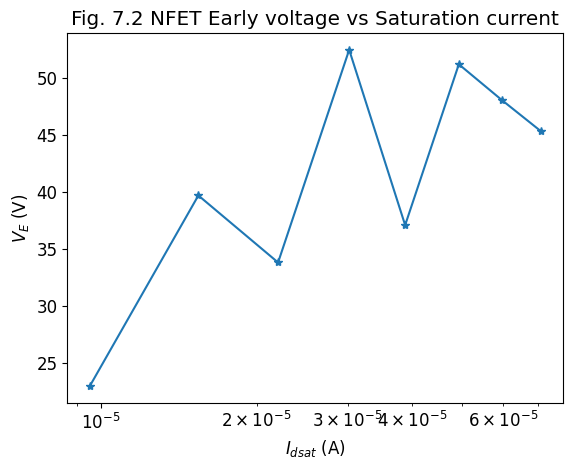

In [91]:
# the data are vg_arr_n,vds_actual_n, ids_vs_vds_n
idx=np.where(vds_actual_n>.8)
vds=vds_actual_n[idx]
ve_fits=[]
id_sats=[]
v_earlys=[]
for i in range(ids_vs_vds_n.shape[0]): # for each drain curve
    ids=np.squeeze(ids_vs_vds_n[i,idx]) # we have to squeeze (remove the singleton dimension for this stupid array)
    ve_fit=np.polyfit(vds,ids,1) # compute linear fit, ve_fit[0] is the slope and ve_fit[1] is the y-intercept (id_sat)
    ve_fits.append(ve_fit)
    idsat=ve_fit[1] # Id_sat
    didv=ve_fit[0] # d(I)/d(V)
    id_sats.append(idsat)
    vearly=idsat/didv # NOTE does this make sense?
    v_earlys.append(vearly)

plt.semilogx(id_sats,v_earlys,'-*')
plt.title(f'Fig. 7.2 NFET Early voltage vs Saturation current')
plt.xlabel('$I_{dsat}$ (A)')
plt.ylabel('$V_{E}$ (V)')



In [92]:
savevars(datapath/'early')

[INFO]: 2025-10-07 16:51:45,366 - saveloadvars - Saved to data/lab3/early.dill variables [ datapath vdd Is_n Id_n vg_values Is_n_list Id_n_list vg Is_p Id_p n_samples vs vd vb vds vg_low vg_high vg_arr vgn_actual id_n is_n vgp_actual id_p is_p ids_n ids_p idn_corr idp_corr vgn_lin idn_lin vgp_lin idp_lin fit_n fit_p idn_fit idp_fit vt0_n vt0_p beta_n beta_p beta_np_ratio mu_n mu_p vds_sat vgn_actual_sat ids_n_sat is_n_sat vgp_actual_sat ids_p_sat is_p_sat beta_n_sat beta_p_sat idn_corr_sat idp_corr_sat vgn_lin_sat idn_lin_sat vgp_lin_sat idp_lin_sat fit_n_sat fit_p_sat idn_fit_sat idp_fit_sat vt0_n_sat vt0_p_sat n_gate_voltages vg_arr_n vg_arr_p vd_arr i vgn vgp vds_actual_n vds_actual_p ids_vs_vds_n ids_vs_vds_p id_sats v_earlys ids ve_fit idsat didv vearly vds_target idx_n leg v vgn_line idn_line gm_n fit ids_fit ] (File "/opt/miniconda3/envs/ne1/lib/python3.9/site-packages/jupyter_save_load_vars.py", line 219, in savevars)
[WARNING]: 2025-10-07 16:51:45,367 - saveloadvars - could no

* Comment on your results: How constant is the Early voltage with drain current? Speculate on the reasons for your observations.

They are not constant

# 8 Saturation drain voltage

* Can you see how the saturation voltage increases with the gate overdrive $V_{\rm ov}$ in strong inversion? Please comment if the observation matches the model of $V_{\rm dsat}$ or not. I.e. is it true quantitatively that $V_{\rm dsat}=V_{\rm ov}$?


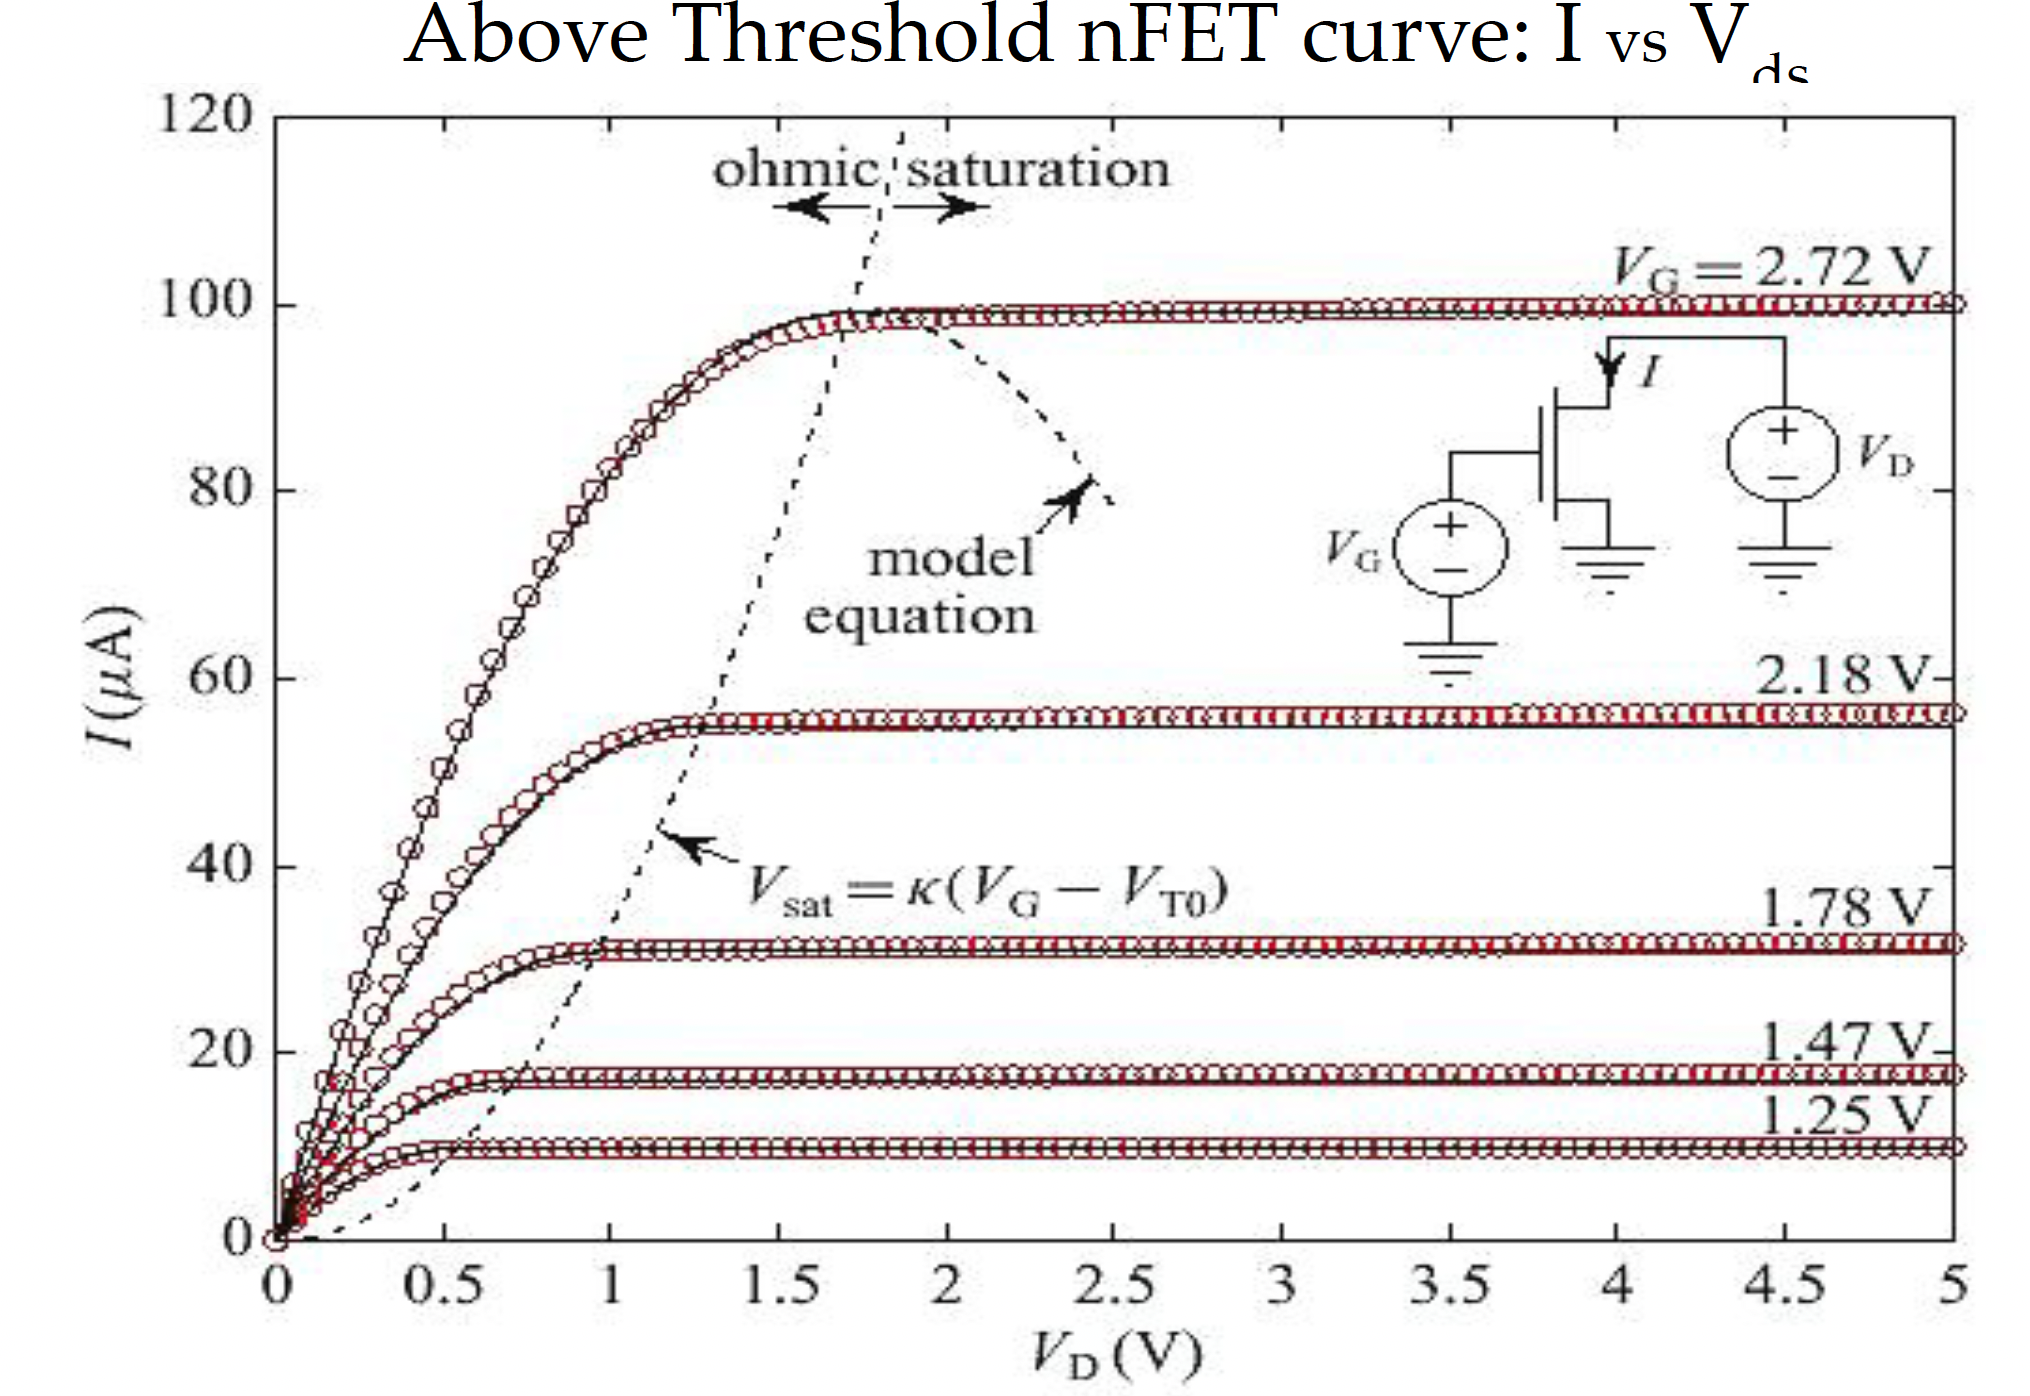

* Using your prior measurement of $V_{Tn}$, can you plot together with the $I_{ds}$ curves a curve showing the predicted  $V_{\rm dsat}$ values?

Vdsat_n: [0.035674   0.12138829 0.20710258 0.29281686 0.37853115 0.46424543
 0.54995972 0.635674  ]


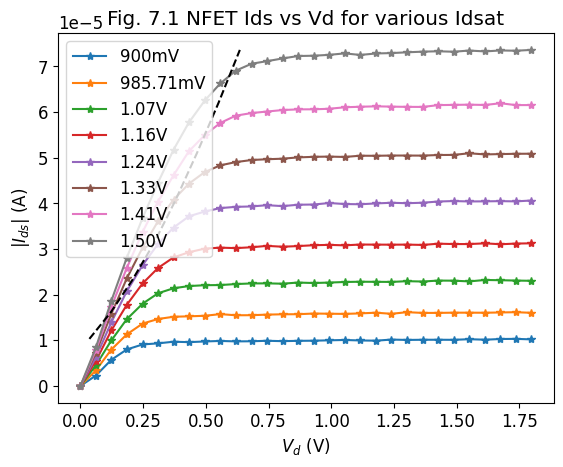

In [114]:
# Using your prior measurement of $V_{Tn}$, can you plot together with the $I_{ds}$ curves a curve showing the predicted  $V_{\rm dsat}$ values?
def plot_idsvds_curves_with_vsat(vg_arr, vds, ids_matrix, title,vt0_n):
    plt.title(f'Fig. 7.1 {title} Ids vs Vd for various Idsat')
    plt.ylabel('|$I_{ds}|$ (A)')
    plt.xlabel('$V_{d}$ (V)') # note absolute value here
    leg=[]
    for i,v in enumerate(vg_arr):
        plt.plot(vds,np.transpose(ids_matrix[i,:]),'-*')
        leg.append(str(ef(v))+'V')

    plt.legend(leg)
    vdsat_n=(vg_arr-vt0_n)#*vds/beta_n # NOTE does this make sense?
    print(f'Vdsat_n: {vdsat_n}')
    plt.plot(vdsat_n,np.max(ids_matrix,axis=1),'k--',label='Vdsat')
plot_idsvds_curves_with_vsat(vg_arr_n,vds_actual_n, ids_vs_vds_n, 'NFET',vt0_n_sat)




In [115]:
savevars(datapath/'final_data', overwrite='yes')

[INFO]: 2025-10-07 17:28:06,623 - saveloadvars - Saved to data/lab3/final_data.dill variables [ datapath vdd Is_n Id_n vg_values Is_n_list Id_n_list vg Is_p Id_p n_samples vs vd vb vds vg_low vg_high vg_arr vgn_actual id_n is_n vgp_actual id_p is_p ids_n ids_p idn_corr idp_corr vgn_lin idn_lin vgp_lin idp_lin fit_n fit_p idn_fit idp_fit vt0_n vt0_p beta_n beta_p beta_np_ratio mu_n mu_p vds_sat vgn_actual_sat ids_n_sat is_n_sat vgp_actual_sat ids_p_sat is_p_sat beta_n_sat beta_p_sat idn_corr_sat idp_corr_sat vgn_lin_sat idn_lin_sat vgp_lin_sat idp_lin_sat fit_n_sat fit_p_sat idn_fit_sat idp_fit_sat vt0_n_sat vt0_p_sat n_gate_voltages vg_arr_n vg_arr_p vd_arr i vgn vgp vds_actual_n vds_actual_p ids_vs_vds_n ids_vs_vds_p id_sats v_earlys ids ve_fit idsat didv vearly vds_target idx_n leg v vgn_line idn_line gm_n fit ids_fit vdsat_n ] (File "/opt/miniconda3/envs/ne1/lib/python3.9/site-packages/jupyter_save_load_vars.py", line 219, in savevars)
[WARNING]: 2025-10-07 17:28:06,624 - saveloadva

# 9 Congratulations

**If you completed this lab, you have done a lot!** This is one of the most time-consuming labs but also one of the most important, because practical and intuitive knowledge of transistor characteristics is crucial in understanding and synthesizing new circuits that work.

## Upload your report (this notebook)
Upload your report to the course dropbox as either HTML or PDF (not pynb, which is hard for us to assess).

## What we expect you to learn
Please see the [NE1 exam preparation guide](https://drive.google.com/file/d/1nOq3UbcEv_ik425VBYqcH9hAET7FyIeP/view?usp=drive_link)
